In [550]:
import pandas as pd
import numpy as np

In [551]:
data = pd.read_csv('./fastfood.csv', na_values=['-', ' ', ''])

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   512 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      514 non-null    float64
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      513 non-null    float64
 13  calcium      305 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 56.5+ KB


In [553]:
data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60.0,7,2.0,0.0,95,1110,44,3.0,11,37.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410.0,45,17.0,1.5,130,1580,62,2.0,18,46.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600.0,67,27.0,3.0,220,1920,63,3.0,18,70.0,50.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280.0,31,10.0,0.5,155,1940,62,2.0,18,55.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410.0,45,12.0,0.5,120,1980,81,4.0,18,46.0,20.0


In [554]:
data = data.loc[data['total_fat'] <= 125]

In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   510 non-null    object 
 1   item         513 non-null    object 
 2   calories     513 non-null    int64  
 3   cal_fat      512 non-null    float64
 4   total_fat    513 non-null    int64  
 5   sat_fat      513 non-null    float64
 6   trans_fat    513 non-null    float64
 7   cholesterol  513 non-null    int64  
 8   sodium       513 non-null    int64  
 9   total_carb   513 non-null    int64  
 10  fiber        501 non-null    float64
 11  sugar        513 non-null    int64  
 12  protein      511 non-null    float64
 13  calcium      304 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 60.1+ KB


In [556]:
# Mozemo da obrisemo celu kolonu calcium, jer ima previse null vrednosti (preko 20%)
# Mozemo da obrisemo cele kolone restoran i item, jer ne uticu na predikciju proteina u nekom proizvodu
data.drop(columns=['calcium', 'restaurant', 'item'], inplace=True)

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     513 non-null    int64  
 1   cal_fat      512 non-null    float64
 2   total_fat    513 non-null    int64  
 3   sat_fat      513 non-null    float64
 4   trans_fat    513 non-null    float64
 5   cholesterol  513 non-null    int64  
 6   sodium       513 non-null    int64  
 7   total_carb   513 non-null    int64  
 8   fiber        501 non-null    float64
 9   sugar        513 non-null    int64  
 10  protein      511 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 48.1 KB


In [558]:
from scipy.stats import shapiro

nullable_columns = ['cal_fat', 'fiber', 'protein']

for nullable_column in nullable_columns:
    non_nullable_column_data = data[nullable_column].dropna()
    _, p = shapiro(non_nullable_column_data)
    print(f'{p}')
    if (p < 0.05):
        data[nullable_column].fillna(non_nullable_column_data.median(), inplace=True)
    else:
        data[nullable_column].fillna(non_nullable_column_data.mean(), inplace=True)
    

6.757332391663269e-17
5.690708577506462e-20
3.866950249677197e-18


In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     513 non-null    int64  
 1   cal_fat      513 non-null    float64
 2   total_fat    513 non-null    int64  
 3   sat_fat      513 non-null    float64
 4   trans_fat    513 non-null    float64
 5   cholesterol  513 non-null    int64  
 6   sodium       513 non-null    int64  
 7   total_carb   513 non-null    int64  
 8   fiber        513 non-null    float64
 9   sugar        513 non-null    int64  
 10  protein      513 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 48.1 KB


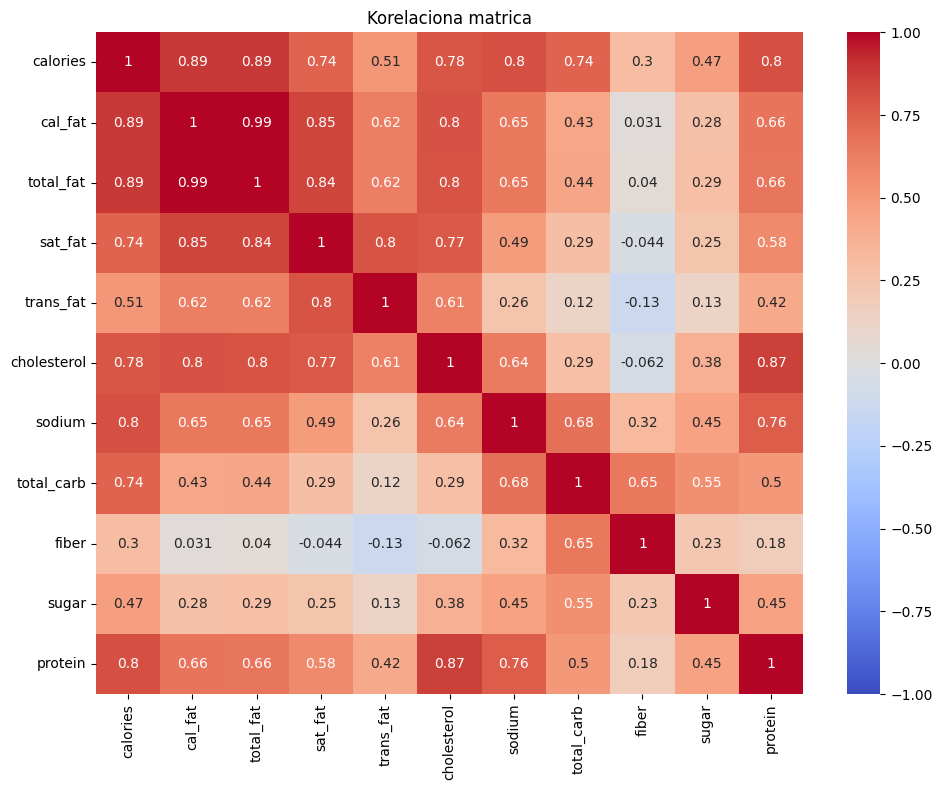

In [560]:
import matplotlib.pyplot as plt
import seaborn as sb

corr_matrix = data.corr(numeric_only=True).round(2)
plt.figure(figsize=(10, 8))
sb.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelaciona matrica")
plt.tight_layout()
plt.show()

In [561]:
# za dodatnu jedinicu kalorije povecavamo protein za 0.8
# za dodatnu jedinicu holesterola povecavamo protein za 0.87
# za dodatnu jedinicu sodiuma povecavamo protein za 0.76
# granicna vrednost koju cemo da uzmemo kao kriterijum za izbacivanje feature-a je 0.7
data = data[['calories', 'cholesterol', 'sodium', 'protein']]

In [562]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

model = smf.ols(formula=f'protein ~ calories + cholesterol + sodium', data=train_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                protein   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     598.7
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          1.25e-148
Time:                        23:23:24   Log-Likelihood:                -1374.2
No. Observations:                 410   AIC:                             2756.
Df Residuals:                     406   BIC:                             2773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7467      0.774      3.551      

In [563]:
# R-squared, medijana reziduala
# Reziduali su razlike izmedju predvidjenih i stvarnih vrednosti, i treba da odskacu po malo od 0.
# R-squared - 0.816, nas model objasnjava oko 81.6% varijabilnosti proteina

# F-statistic, Prob
# F-statistic je veliki a Prob (f-statistic) je blizu 0 => model kao celina je znacajan

# coef, intercept
# Kada su svi feature-i 0 intercept nam govori da ce protein biti 2.7467
# Za svaku jedinicnu promenu calories protein ce se povecati za 0.0066
# Za svaku jedinicnu promenu cholesterol protein ce se povecati za 0.1734
# Za svaku jedinicnu promenu sodium protein ce se povecati za 0.0072

# P>|t|
# Posto su svi P>|t| blizu nule svi feature-i su znacajni
# od njih najmanje znacajan je feature calories

# Standard Errors assume that the covariance matrix of the errors is correctly specified.
# The condition number is large, 3.46e+03. This might indicate that there are strong multicollinearity or other numerical problems.

In [564]:
X_test = test_data.drop(columns='protein')
y_true = test_data['protein']

y_pred = model.predict(X_test)

In [565]:
result = pd.DataFrame({
    'Predicted': y_pred,
    'Real': y_true
})

result.head()

,Predicted,Real
34,23.891304,28.0
202,21.010936,22.0
86,15.677141,15.0
276,18.341021,13.0
36,46.539851,58.0


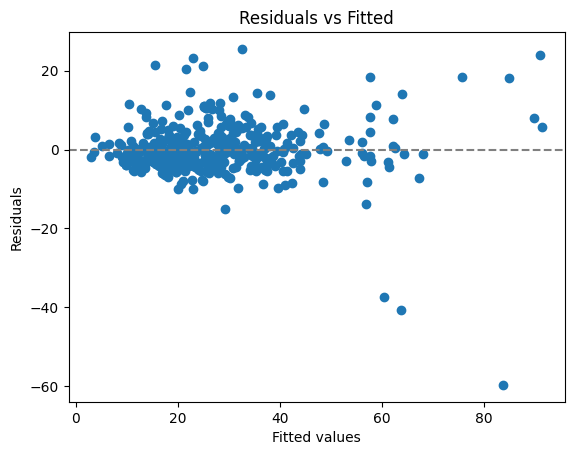

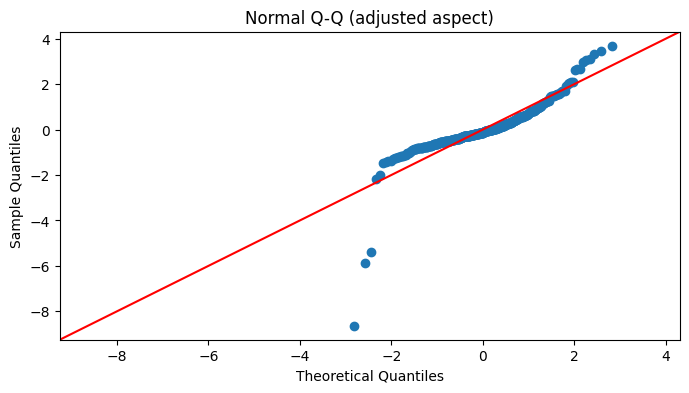

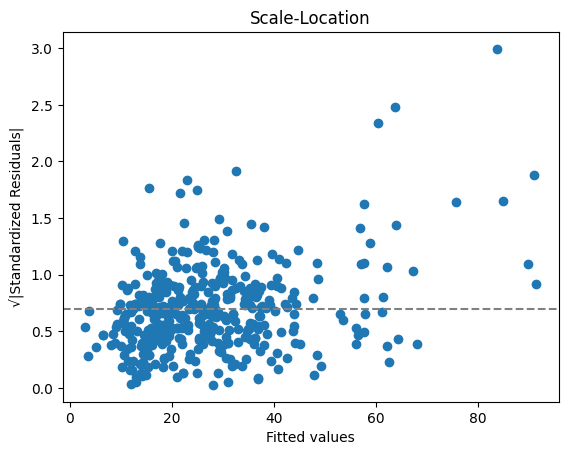

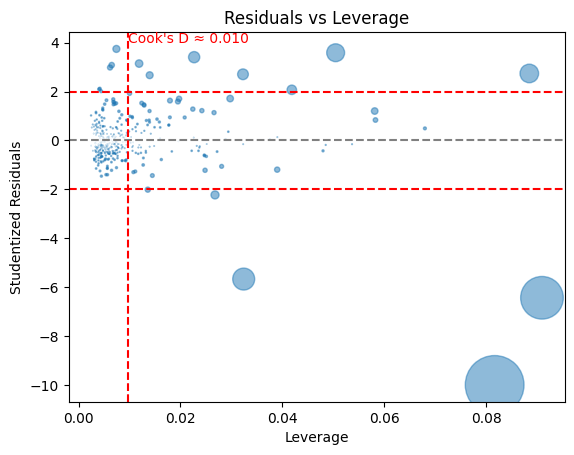

In [566]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Residuals vs Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Normal Q-Q (širi graf da linija deluje blaže)
sm.qqplot(model.resid, line='45', fit=True)
plt.gcf().set_size_inches(8, 4)
plt.title("Normal Q-Q (adjusted aspect)")
plt.show()

# Scale-Location
influence = model.get_influence()
std_resid = influence.resid_studentized_internal
abs_sqrt_resid = np.sqrt(np.abs(std_resid))
plt.scatter(model.fittedvalues, abs_sqrt_resid)
plt.axhline(np.mean(abs_sqrt_resid), color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized Residuals|")
plt.title("Scale-Location")
plt.show()

# Residuals vs Leverage + Cook's D threshold
leverage = influence.hat_matrix_diag
stud_resid = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]
n = len(model.model.endog)
thresh = 4 / n
plt.scatter(leverage, stud_resid, s=1000 * cooks_d, alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
plt.axvline(thresh, color='red', linestyle='--')
plt.text(thresh, plt.ylim()[1]*0.9, f"Cook's D ≈ {thresh:.3f}", color='red')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Residuals vs Leverage")
plt.show()

In [567]:
# Residuals vs Fitter - pretpostavka linearnosti
# Posto vrednosti odstupaju od horizontalne linije pretpostavka linearnosti otpada => neadekvatnost modela

# Normal Q-Q - pretpostavka normalne raspodele
# Posto vrednosti odstupaju od dijagonalne linije pretpostavka normalne raspodele otpada

# Scale-Location
# govori nam da li je varijabilnost reziduala konstantna duz predikcija
# Posto vrednosti odstupaju od crvene linije i jer ona nije horizontalna pretpostavka otpada

# Residuals vs Leverage
# Ovaj grafik nam prikazuje outliere, outlieri su van kukovih granica

In [568]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
import pandas as pd

# Pripremamo X: svi prediktori iz train_df + konstanta. Pod prediktore se smatraju varijable koje su korišćene pri kreiranju modela. U ovom slučaju posmatramo lm3 - zbog toga uzimamo sve varijable iz train seta osim varijable medv.
X = sm.add_constant(train_data.drop(columns='protein'))
# Računamo VIF za svaki prediktor i vadimo kvadratni koren (√VIF)
# √VIF iznad 2 - potencijalna kolinearnost (prag po izboru)
print("√VIF sa svim prediktorima:")
print((pd.Series([vif(X.values, i) for i in range(X.shape[1])],
                 index=X.columns) ** 0.5).sort_values(ascending=False))

# # Ponovno računanje VIF nakon izbacivanja 'calories'
X_no_calories = sm.add_constant(train_data.drop(columns=['protein', 'calories']))
# Ponovo računamo √VIF
print((pd.Series([vif(X_no_calories.values, i) for i in range(X_no_calories.shape[1])],
                 index=X_no_calories.columns) ** 0.5).sort_values(ascending=False))

√VIF sa svim prediktorima:
const          2.255865
calories       2.069238
sodium         1.673344
cholesterol    1.623138
dtype: float64
const          2.097196
sodium         1.311350
cholesterol    1.311350
dtype: float64
